In [2]:
#!unzip "archive.zip" -d "\Insurance_age_Logistic_Regression"

Archive:  archive.zip
  inflating: \Insurance_age_Logistic_Regression/insurance_data.csv  


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline

In [19]:
data = pd.read_csv('\Insurance_age_Logistic_Regression\insurance_data.csv')
data = df(data)

In [20]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


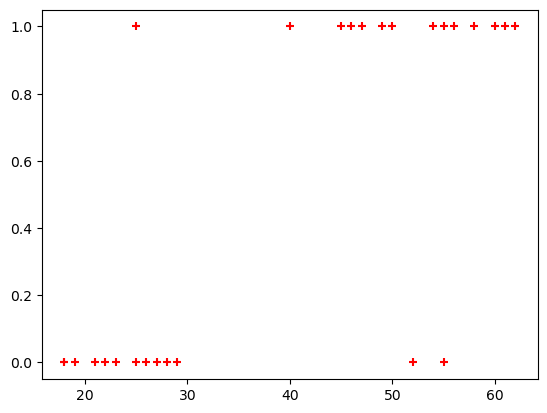

In [24]:
plt.scatter(data.age, data.bought_insurance, marker = "+", color = "r")

In [49]:
data['age']

0     22
1     25
2     47
3     52
4     46
5     56
6     55
7     60
8     62
9     61
10    18
11    28
12    27
13    29
14    49
15    55
16    25
17    58
18    19
19    18
20    21
21    26
22    40
23    45
24    50
25    54
26    23
Name: age, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data[['age']], data.bought_insurance, test_size=.1,random_state =3)

In [60]:
y_train

25    1
15    1
16    1
13    0
2     1
1     0
23    1
14    1
4     1
22    1
6     0
7     1
5     1
20    0
9     1
11    0
26    0
19    0
21    0
0     0
8     1
3     0
24    1
10    0
Name: bought_insurance, dtype: int64

In [61]:
model = LogisticRegression()

In [62]:
model.fit(X_train, y_train)

LogisticRegression()

In [64]:
model.predict(X_test)

array([0, 1, 0], dtype=int64)

In [65]:
model.score(X_test, y_test)

1.0

### probablity of each person will buy Insurance (X_test)

In [68]:
model.predict_proba(X_test)

array([[0.91920099, 0.08079901],
       [0.07767842, 0.92232158],
       [0.80615397, 0.19384603]])

In [77]:
coef = model.coef_[0]
print(coef)

[0.12579119]


In [79]:
intercept = model.intercept_
intercept

array([-4.82157279])

In [80]:
# Define a function to calculate the predicted probability of y=1 for a given x
def logistic_function(x):
    return 1 / (1 + np.exp(-(coef * x + intercept)))

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


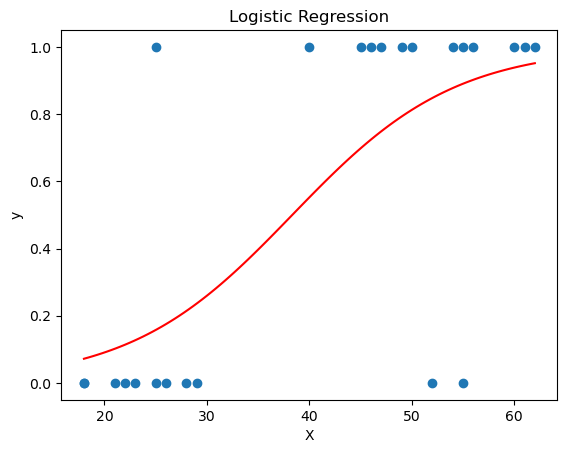

In [81]:
# Plot the training data points
plt.scatter(X_train, y_train)

# Plot the logistic regression line
x_vals = np.linspace(np.min(X_train), np.max(X_train), 100)
y_vals = logistic_function(x_vals)
plt.plot(x_vals, y_vals, c='r')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression')

plt.show()


